### In this Notebook, we will try to analyze ipl data with python Data Analysis libraries.

___

## Questions:

1. **How many matches we’ve got in the dataset?**
2. **How many seasons we’ve got in the dataset?**
3. **Which Team had won by maximum runs?**
4. **Which Team had won by maximum wicket?**
5. **Which Team had won by closest Margin (minimum runs)?**
6. **Which Team had won by minimum wicket?**
7. **Which Season had most number of matches?**
8. **Which IPL Team is more successful?**
9. **Top player of the match Winners**
10. **Has Toss-winning helped in winning matches?**

### Loading Libraries

Let us begin our analysis by loading the above mentioned Python Modules/Packages/Libraries.

In [1]:
import numpy as np # numerical computing 
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # modern visualization

To make our plots look nice, let us set a theme for our seaborn (sns) plots and also let us define the size in which we would like to print the plot figures.

In [3]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)

### Reading input dataset

In [4]:
pwd

'C:\\Users\\VarunCK\\Documents\\python_machine_learning\\IPL'

In [6]:
file_path = 'C:\\Users\\VarunCK\\Documents\\python_machine_learning\\IPL'

In [8]:
matches = pd.read_csv(file_path + "\\" + 'matches.csv')

### Get basic information of Data

To begin humbly, Let us check the basic information of the dataset. The very basic information to know is the dimension of the dataset — rows and columns — that’s what we find out with the method shape.

In [9]:
matches.shape

(636, 18)

And then, It’s important to know the different types of data/variables in the given dataset.

In [10]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


Moving one level up, let’s perform a simple summary statistics using the method describe().

In [11]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


And the final level of this basic information retrieval is to see a couple of actual rows of the input dataset.

In [12]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


Now, with the basic understanding of the input datasetwe will start to answer our questions with basic data analysis.
___

## 1. How many matches we’ve got in the dataset?

As we’ve seen above, id is a variable that counts each observation in the data while each observation is a match. So to get the number of matches in our dataset is as same as to get the number of rows in the dataset or maximum value of the variable id.

In [15]:
matches['id'].max()

636

**636** IPL Matches is what we’ve got in our dataset.
___

## 2. How many seasons we’ve got in the dataset?

IPL like any other Sports league, happens once in a year and so getting the number of unique years we’ve got in the dataset will tell us how many seasons we’ve got in the dataset.

In [22]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

That gives the list of years, but to answer the question with just the required answer, let’s calculate length of the list that was returned in the above step.

In [23]:
len(matches['season'].unique())

10

Or

In [59]:
matches['season'].nunique()

10

Or

In [64]:
len(matches.groupby('season').count()['id'])

10

So totally we had **10** seasons in the IPL
___

## 3. Which Team had won by maximum runs?

In [26]:
matches[matches['win_by_runs'] == matches['win_by_runs'].max()]['winner']

43    Mumbai Indians
Name: winner, dtype: object

Or

To answer this question, we can divide the question logically — first we need to find maximum runs, then we can find the row (winning team) with this maximum runs — which would indeed be the team won by maximum runs. I’d like to emphasis here that it’s always important to divide your problem into logical sub-problems or modules and then build Python expressions/codes for those sub-modules finally adding them up to required code that will result in the solution.

In [27]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

`idxmax` will return the `id` of the maximumth value which in turn is fed into iloc that takes an index value and returns the row.

If we’re interested only in the winning team in that row, then that could be retrieved as below.

In [28]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

**Mumbai Indians** has won by maximum number of runs.
___

## 4. Which Team had won by maximum wickets? 

In [33]:
matches[matches['win_by_wickets'] == matches['win_by_wickets'].max()]['winner'].head(1)

2    Kolkata Knight Riders
Name: winner, dtype: object

Or

In [34]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

**Kolkata Knight Riders** has won by maximum number of wickets.
___

## 5. Which Team had won by (closest margin) minimum runs?

In [35]:
matches[matches['win_by_runs'] == matches['win_by_runs'].max()]['winner'].head(1)

43    Mumbai Indians
Name: winner, dtype: object

Or

To know the team that was won by the closest margin, we have to do the opposite of what we’ve done in the above steps. But there’s a caveat in that. In Cricket, if the team that’s batting second wins the match (by chasing), it’ll be said “Team second won by x number of wickets” and if the team that’s bowling second (batted first) wins the match (by defending their score), it’ll be said “Team first won by x number of runs”. Hence, the minimum win by runs will always be 0 and the minimum win by wickets will also always be 0 in a tournament since sometimes chasing team or sometimes the team that batted first could win. To overcome this caveat, we just have to apply a simple workaround as you can see below.

In [42]:
matches.iloc[matches[matches['win_by_runs'].ge(1)]['win_by_runs'].idxmin()]['winner']

'Mumbai Indians'

Instead of just getting the minimum score (which always would be 0), we have subsetted the data that has win_by_runs greater than or equal to 1 (there by eliminating the zero-issue).

**Mumbai Indians** has won by minimum number of runs.
___

## 6. Which Team had won by minimum wicket/wickets?

In [48]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)]['win_by_wickets'].idxmin()]['winner']

'Kolkata Knight Riders'

**Kolkata Knight Riders** won by miimum number of wickets.
___

## 7. Which season had most number of matches?

We know that if each row is a match, then counting the number of instances/rows of every season would give us the number of matches for every season.

**countplot()** function in seaborn does the job right away (without the need of an explicit group_by and count)

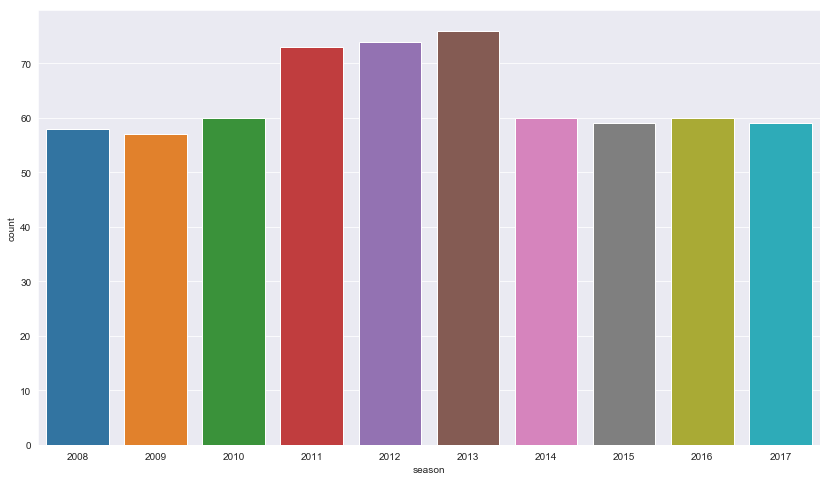

In [43]:
sns.countplot(data=matches, x='season')

**Season 2013** had maximum number of matches.
___

## 8. Which IPL Team is more successful?

The most successful IPL team is the team that has won most number of times. Which also means, answer it to this is as same as the above exercise except counting the number of instances in each season, here we’ve to count the number of instances in each winning team.

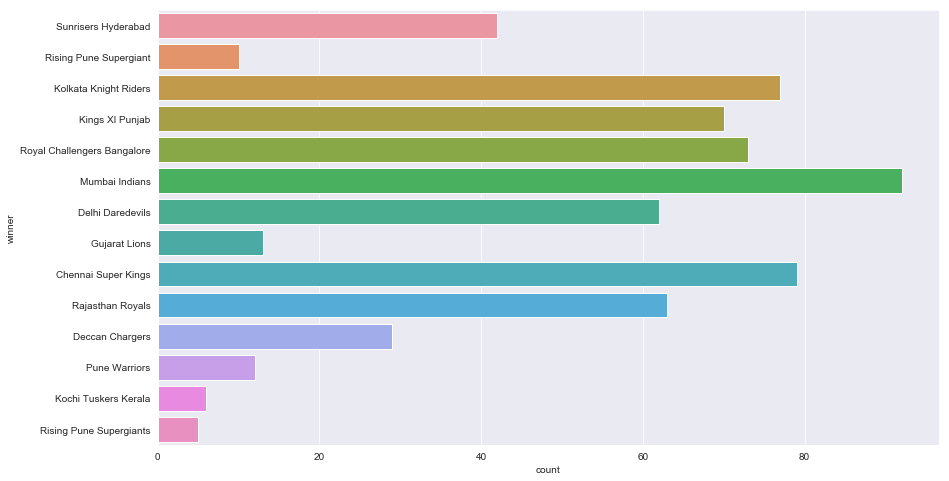

In [49]:
sns.countplot(y='winner', data=matches)

Or

In [50]:
data = matches['winner'].value_counts()

In [51]:
data

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [52]:
data.index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Gujarat Lions', 'Pune Warriors', 'Rising Pune Supergiant',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype='object')

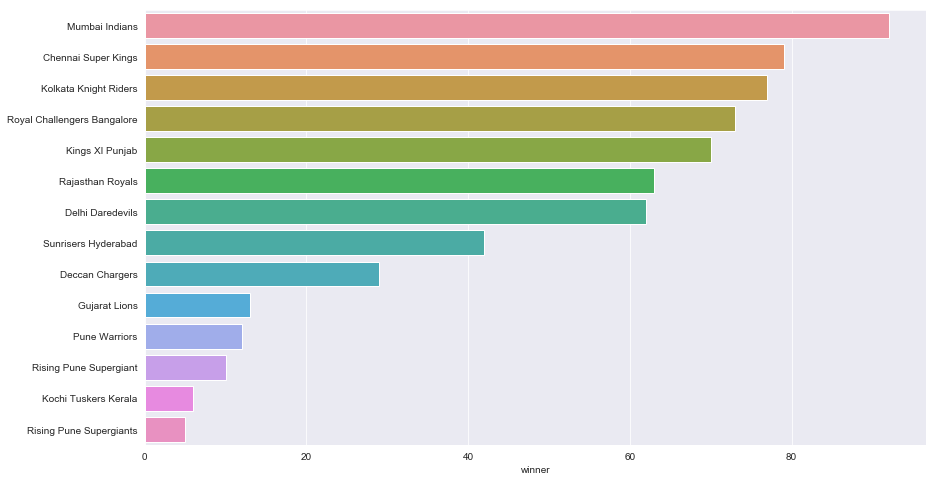

In [58]:
sns.barplot(x=data, y=data.index)

**Mumbai Indians** have won the maximum number of matches `(92 matches)`.
___

## 9. Top player of the match Winners

In [79]:
matches['player_of_match'].value_counts().head(10)

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
G Gambhir         13
MS Dhoni          13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

Or

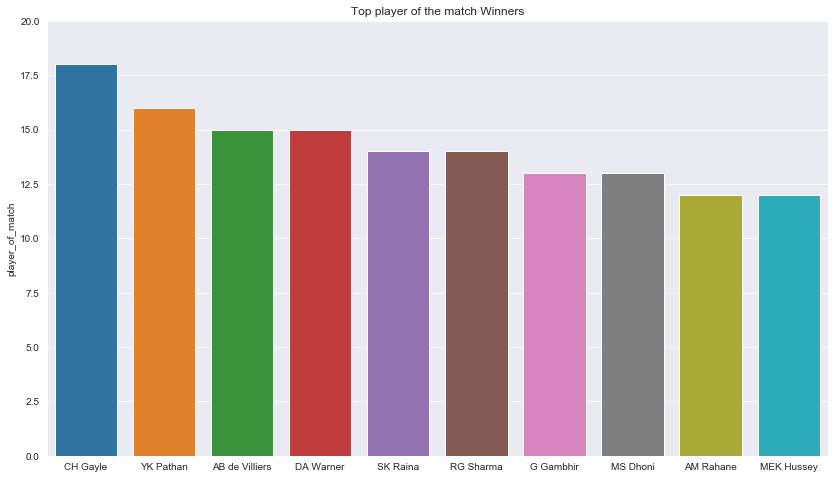

In [82]:
top_players = matches['player_of_match'].value_counts()[:10]

fig, axes = plt.subplots()
axes.set_ylim([0,20])
axes.set_ylabel('count')
axes.set_title('Top player of the match Winners')

sns.barplot(x= top_players.index, y=top_players, orient='v')

**Chris Gayle**, is the most successful IPL player
___

## 10. Has Toss-winning helped in Match-winning?

In [88]:
ss = matches['toss_winner'] == matches['winner']

In [89]:
ss

0      False
1       True
2       True
3       True
4       True
5       True
6       True
7      False
8      False
9       True
10      True
11      True
12      True
13     False
14      True
15      True
16     False
17     False
18     False
19     False
20      True
21      True
22      True
23     False
24      True
25     False
26     False
27     False
28      True
29      True
       ...  
606     True
607    False
608     True
609     True
610     True
611    False
612    False
613     True
614    False
615     True
616     True
617     True
618    False
619    False
620    False
621    False
622    False
623     True
624     True
625    False
626     True
627     True
628    False
629     True
630    False
631     True
632     True
633    False
634     True
635     True
Length: 636, dtype: bool

In [90]:
ss.groupby(ss).size()

False    311
True     325
dtype: int64

Looks like, Toss winning actually helps in Match winning — or to be statistically right, we could say there’s a correlation between Toss Winning and Match Winning and so we can assume that it helps.

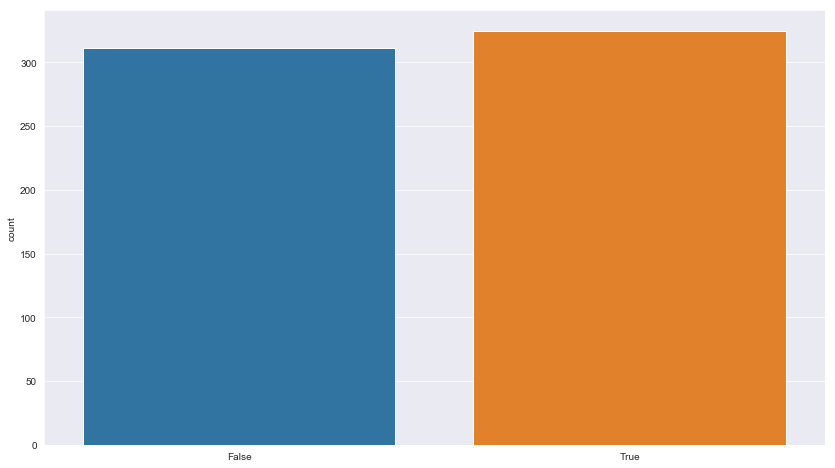

In [91]:
sns.countplot(ss)

 ___


## Thank You!